In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

traindata = np.loadtxt('IDSWeedCropTrain.csv', delimiter=',')
testdata = np.loadtxt('IDSWeedCropTest.csv', delimiter=',')
train_data = traindata[:,:-1]
train_labels = traindata[:,-1]
test_data = testdata[:,:-1]
test_labels = testdata[:,-1]

murderdata = np.loadtxt('murderdata2d.txt')

In [2]:
#Exercise 1.a
def pca(data):
    #Linear Algebra
    cov_matrix = np.cov(np.transpose(data))
    eigenvals, eigenvecs = np.linalg.eig(cov_matrix)
    
    #Sorting eigenvectors by their largest eigenvalues
    sorter = np.argsort(eigenvals)
    sorter = np.flipud(sorter)
    sorted_eigenvals = np.real(eigenvals[sorter][:])
    sorted_eigenvecs = np.real(eigenvecs[:,sorter])

    return sorted_eigenvals, sorted_eigenvecs

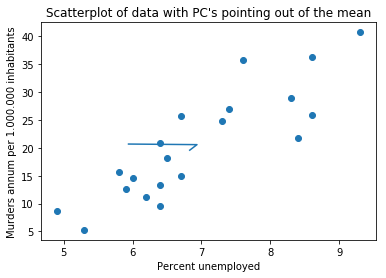

In [3]:
#Exercise 1.b
eigenvals, eigenvecs = pca(murderdata)
meanpoint = (np.mean(murderdata[:,0]), np.mean(murderdata[:,1]))
plt.plot([eigenvecs[0,0]+meanpoint[0], meanpoint[0], eigenvecs[1,0]+meanpoint[0]], [eigenvecs[0,1]+meanpoint[1], meanpoint[1], eigenvecs[1,1]+meanpoint[1]])
plt.scatter(murderdata[:,0],murderdata[:,1])
plt.title('Scatterplot of data with PC\'s pointing out of the mean')
plt.ylabel('Murders annum per 1.000.000 inhabitants')
plt.xlabel('Percent unemployed')
plt.show()

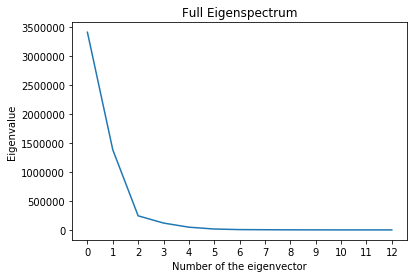

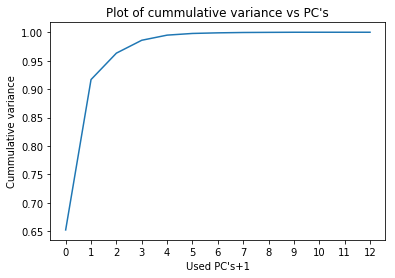

Variance captured by eigenvector number 1: 0.652324184599
Variance captured by eigenvector number 2: 0.916769364729
We need 2 eigenvector(s) to capture 90% variance.

Variance captured by eigenvector number 1: 0.652324184599
Variance captured by eigenvector number 2: 0.916769364729
Variance captured by eigenvector number 3: 0.963251711262
We need 3 eigenvector(s) to capture 95% variance.


In [4]:
#Exercise 1.c
eigenvals, eigenvecs = pca(train_data)

#Plotting full eigenspectrum
plt.plot(eigenvals)
plt.title('Full Eigenspectrum')
plt.ylabel('Eigenvalue')
plt.xlabel('Number of the eigenvector')
plt.xticks(np.arange(0, 13, 1.0))
plt.show()

#Cummulative variance versus PC
plt.plot(np.cumsum(eigenvals)/np.sum(eigenvals))
plt.title('Plot of cummulative variance vs PC\'s')
plt.ylabel('Cummulative variance')
plt.xlabel('Used PC\'s+1') #0 means 1 PC and so on
plt.xticks(np.arange(0, 13, 1.0))
plt.show()

for i in range(len(eigenvals)):
    print("Variance captured by eigenvector number " + str(i+1) + ": " + str((np.cumsum(eigenvals)/np.sum(eigenvals))[i]))
    if (np.cumsum(eigenvals)/np.sum(eigenvals))[i] >= 0.9:
        print("We need " + str(i+1) + " eigenvector(s) to capture 90% variance.\n") #Because we start at 0
        break
        
for i in range(len(eigenvals)):
    print("Variance captured by eigenvector number " + str(i+1) + ": " + str((np.cumsum(eigenvals)/np.sum(eigenvals))[i]))
    if (np.cumsum(eigenvals)/np.sum(eigenvals))[i] >= 0.95:
        print("We need " + str(i+1) + " eigenvector(s) to capture 95% variance.") #Because we start at 0
        break

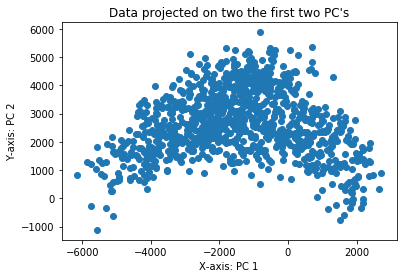

In [9]:
#Exercise 2
def mds(pca_eigenvecs, data):
    #Getting the two first PC's
    two_PC = pca_eigenvecs[:,:2]
    two_PC = np.dot(data, two_PC)
    x, y = two_PC.T
    plt.scatter(x, y)
    
    plt.legend()
    plt.title('Data projected on two the first two PC\'s')
    plt.ylabel('Y-axis: PC 2')
    plt.xlabel('X-axis: PC 1')
    plt.show()
    
    return

eigenvals, eigenvecs = pca(train_data)
mds(eigenvecs, train_data)

In [54]:
#Exercise 3
from sklearn.cluster import KMeans

#Computing initial centroids
centroids = train_data[0:2,:]

#Calculating clusters
clusters = KMeans(2, centroids, n_init=1)
clusters.fit(train_data)
finalclusters = clusters.cluster_centers_
print("My final clusters are:\n" + str(finalclusters))

My final clusters are:
[[  5.70726496e+00   4.93012821e+01   7.92408120e+02   3.85595940e+03
    3.38821368e+03   1.35652778e+03   2.91737179e+02   1.29989316e+02
    6.86111111e+01   3.81880342e+01   1.87692308e+01   4.13461538e+00
    4.42307692e-01]
 [  2.19924812e+00   1.40018797e+01   1.73727444e+02   1.40094549e+03
    3.18759962e+03   2.62043985e+03   1.00147368e+03   6.31413534e+02
    4.95295113e+02   2.95238722e+02   1.45689850e+02   2.91466165e+01
    2.82330827e+00]]
